DỰ ÁN GIỮA KỲ - HỌC MÁY - NHÓM 19 - GV: LÊ ANH CƯỜNG

HỌ TÊN: Nguyễn Minh Đăng Khoa - MSSV: 51800882

TÊN DỮ LIỆU: Post-Operative Patient Data Set

LINK DỮ LIỆU: https://archive.ics.uci.edu/ml/datasets/Post-Operative+Patient

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
names = ('L-CORE', 'L-SURF', 'L-02', 'L-BP', 'SURF-STBL', 'CORE-STBL', 'BP-STBL', 'COMFORT', 'decision ADM-DECS')

In [3]:
df = pd.read_csv("post-operative.data", names= names)
print(df.shape)
print(df.head(5))

(90, 9)
  L-CORE L-SURF       L-02  L-BP SURF-STBL CORE-STBL     BP-STBL COMFORT  \
0    mid    low  excellent   mid    stable    stable      stable      15   
1    mid   high  excellent  high    stable    stable      stable      10   
2   high    low  excellent  high    stable    stable  mod-stable      10   
3    mid    low       good  high    stable  unstable  mod-stable      15   
4    mid    mid  excellent  high    stable    stable      stable      10   

  decision ADM-DECS  
0                 A  
1                 S  
2                 A  
3                 A  
4                 A  


In [4]:
# df.info() # introduce data

### 1/ Mô tả dữ liệu, vẽ đồ thị về dữ liệu

1/ Title: Postoperative Patient Data

2/ Source Information:

   -- Creators: Sharon Summers, School of Nursing, University of Kansas
                Medical Center, Kansas City, KS 66160
                Linda Woolery, School of Nursing, University of Missouri,
                Columbia, MO 65211
                
   -- Donor:    Jerzy W. Grzymala-Busse (jerzy@cs.ukans.edu) (913)864-4488
   
   -- Date:     June 1993

3/ Past Usage:

   -- A. Budihardjo, J. Grzymala-Busse, L. Woolery (1991). Program LERS_LB 2.5
      as a tool for knowledge acquisition in nursing, Proceedings of the 4th
      Int. Conference on Industrial & Engineering Applications of AI & Expert
      Systems, pp. 735-740.

   -- L. Woolery, J. Grzymala-Busse, S. Summers, A. Budihardjo (1991). The use
      of machine learning program LERS_LB 2.5 in knowledge acquisition for 
      expert system development in nursing. Computers in Nursing 9, pp. 227-234.

4/ Relevant Information:
      The classification task of this database is to determine where
      patients in a postoperative recovery area should be sent to next.  
      Because hypothermia is a significant concern after surgery
      (Woolery, L. et. al. 1991), the attributes correspond roughly to body 
      temperature measurements.

      Results:
      -- LERS (LEM2): 48% accuracy

5/ Number of Instances: 90

6/ Number of Attributes: 9 including the decision (class attribute)

7/ Attribute Information:

     1. L-CORE (patient's internal temperature in C):
              high (> 37), mid (>= 36 and <= 37), low (< 36)
              
     2. L-SURF (patient's surface temperature in C):
              high (> 36.5), mid (>= 36.5 and <= 35), low (< 35)
              
     3. L-O2 (oxygen saturation in %):
              excellent (>= 98), good (>= 90 and < 98),
              fair (>= 80 and < 90), poor (< 80)
              
     4. L-BP (last measurement of blood pressure):
              high (> 130/90), mid (<= 130/90 and >= 90/70), low (< 90/70)
              
     5. SURF-STBL (stability of patient's surface temperature):
              stable, mod-stable, unstable
              
     6. CORE-STBL (stability of patient's core temperature)
              stable, mod-stable, unstable
              
     7. BP-STBL (stability of patient's blood pressure)
              stable, mod-stable, unstable
              
     8. COMFORT (patient's perceived comfort at discharge, measured as
              an integer between 0 and 20)
              
     9. decision ADM-DECS (discharge decision):
              I (patient sent to Intensive Care Unit),
              S (patient prepared to go home),
              A (patient sent to general hospital floor)

8/ Missing Attribute Values:

     Attribute 8 has 3 missing values

9/ Class Distribution:

     I (2)
     
     S (24)
     
     A (64)


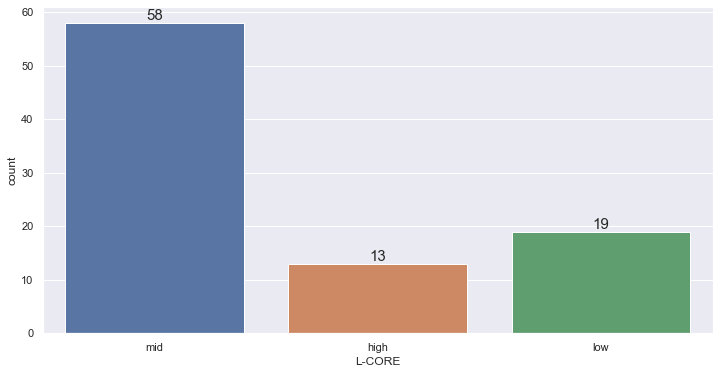

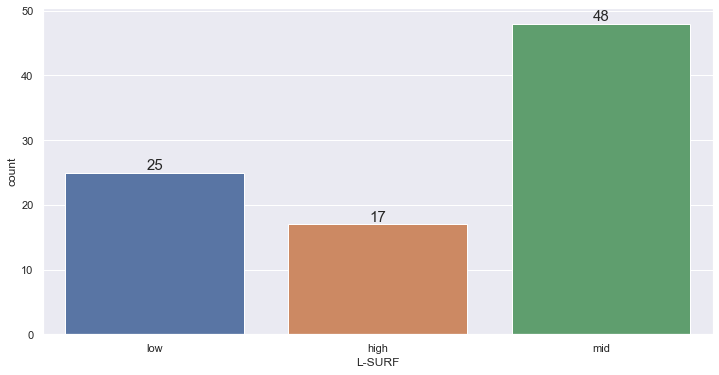

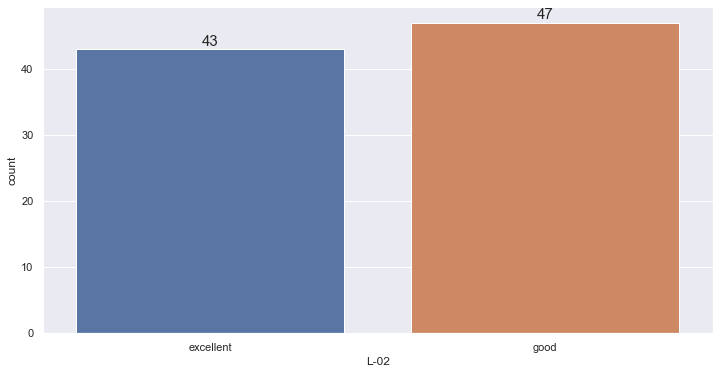

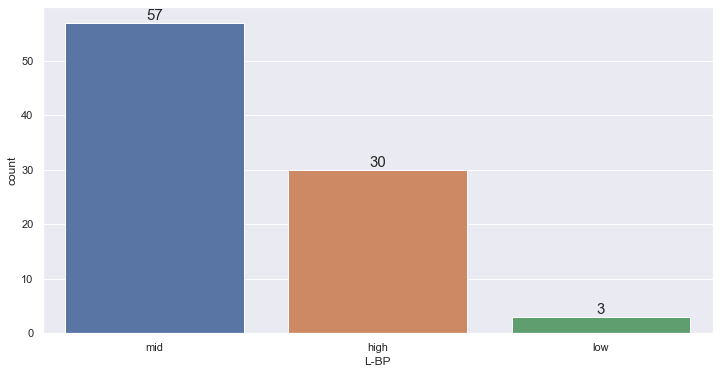

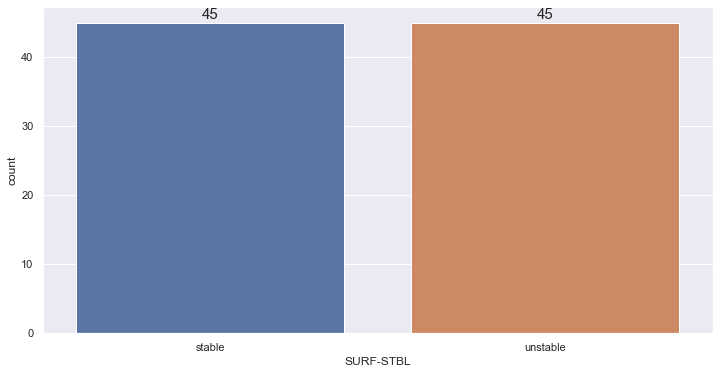

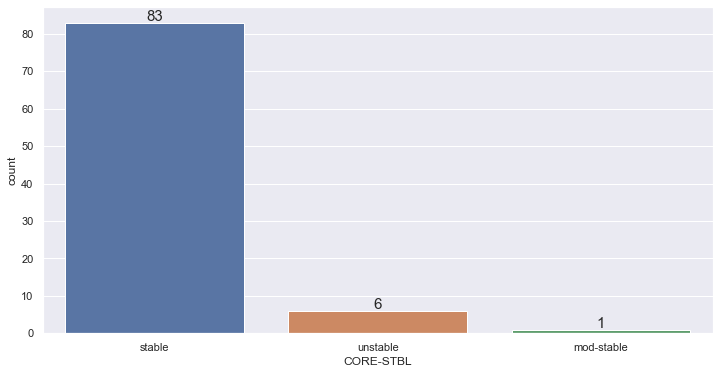

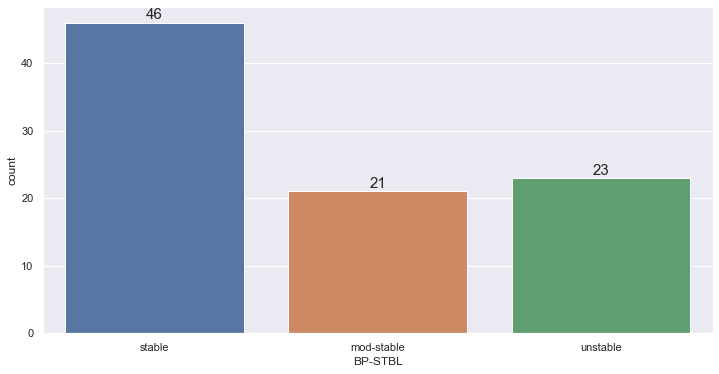

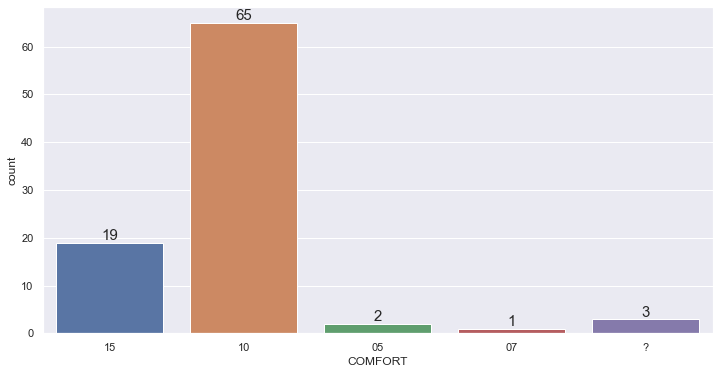

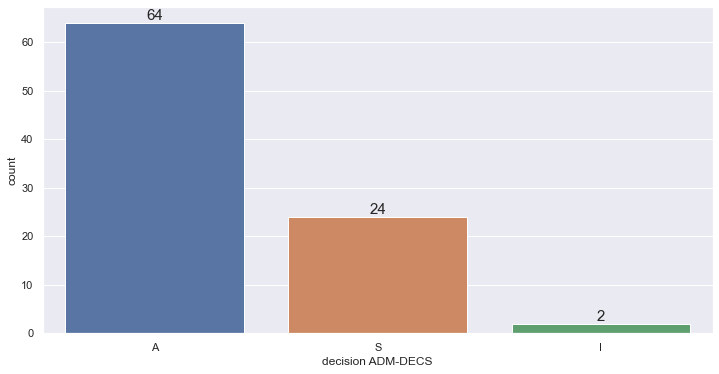

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

total = float(df.shape[0])

sns.set(style='darkgrid')
for i in range(len(names)):
    sns.set(rc={'figure.figsize':(12,6)})
#     ax = sns.countplot(x = names[i], hue=names[i], data = df)
    ax = sns.countplot(x = names[i], data = df)
    
    for p in ax.patches:
        height = p.get_height()
        width = p.get_width()
        ax.text(p.get_x() + width / 2, height + 0.5, height, ha="center", size=15)
        
#         ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.4, p.get_height()), ha='center', color='black', size=18)
    
    
    plt.show()

### 2/ Chuẩn hoá dữ liệu trước khi đưa vào mô hình, xử lý missing data nếu có

In [6]:
# replace '?' values with 'nan'
df[:] = df[:].replace("?", np.nan)

# count the number of nan values in each column
print(df.shape)
print(df.isnull().sum())

# print(df.head(50))

# drop rows with missing values
df.dropna(inplace=True)

print("")

# summarize the shape of the data with missing rows removed
print(df.shape)
print(df.isnull().sum())

(90, 9)
L-CORE               0
L-SURF               0
L-02                 0
L-BP                 0
SURF-STBL            0
CORE-STBL            0
BP-STBL              0
COMFORT              3
decision ADM-DECS    0
dtype: int64

(87, 9)
L-CORE               0
L-SURF               0
L-02                 0
L-BP                 0
SURF-STBL            0
CORE-STBL            0
BP-STBL              0
COMFORT              0
decision ADM-DECS    0
dtype: int64


In [7]:
# chuyển data về dạng numpy
data = df.values[:,:-1]
labels = df.values[:,-1]
# print(data)
# print(labels)

In [8]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
for i in range(data.shape[1]):
    data[:,i] = encoder.fit_transform(data[:,i])
# print(data[:5])

### 3/ Xây dựng các mô hình học máy cho bài toán Classification hoặc Regression, thử nghiệm các mô hình sau: kNN, NB, SVM

### 5/ Đánh giá độ chính xác qua các độ đo precision, recall, F-score, accuracy

In [9]:
# chia tập train và tập test
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 42)
print('Train:')
print(X_train.shape)
print(y_train.shape)
print('Test:')
print(X_test.shape)
print(y_test.shape)

Train:
(69, 8)
(69,)
Test:
(18, 8)
(18,)


In [10]:
from sklearn.naive_bayes import MultinomialNB

model_MultinomialNB = MultinomialNB()
model_MultinomialNB.fit(X_train, y_train)

MultinomialNB()

In [11]:
y_pred_model_MultinomialNB = model_MultinomialNB.predict(X_test)
print("Predict:\n", y_pred_model_MultinomialNB)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [12]:
print(classification_report(y_test, y_pred_model_MultinomialNB, zero_division=0))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.30      0.33      0.31        18
weighted avg       0.79      0.89      0.84        18



In [13]:
from sklearn.naive_bayes import GaussianNB
model_GaussianNB = GaussianNB()
model_GaussianNB.fit(X_train, y_train)

GaussianNB()

In [14]:
y_pred_model_GaussianNB = model_GaussianNB.predict(X_test)
print("Predict:\n", y_pred_model_GaussianNB)
print("Test:\n", y_test)

Predict:
 ['A' 'S' 'A' 'S' 'A' 'A' 'S' 'S' 'A' 'A' 'S' 'A' 'S' 'S' 'S' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [15]:
print(classification_report(y_test, y_pred_model_GaussianNB, zero_division=0))

              precision    recall  f1-score   support

           A       0.90      0.56      0.69        16
           I       0.00      0.00      0.00         1
           S       0.12      1.00      0.22         1

    accuracy                           0.56        18
   macro avg       0.34      0.52      0.30        18
weighted avg       0.81      0.56      0.63        18



In [16]:
from sklearn.naive_bayes import BernoulliNB
model_BernoulliNB = BernoulliNB()
model_BernoulliNB.fit(X_train, y_train)

BernoulliNB()

In [17]:
y_pred_model_BernoulliNB = model_BernoulliNB.predict(X_test)
print("Predict:\n", y_pred_model_BernoulliNB)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [18]:
print(classification_report(y_test, y_pred_model_BernoulliNB, zero_division=0))

              precision    recall  f1-score   support

           A       0.88      0.94      0.91        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.83        18
   macro avg       0.29      0.31      0.30        18
weighted avg       0.78      0.83      0.81        18



In [19]:
from sklearn.neighbors import KNeighborsClassifier

model_kNN = KNeighborsClassifier(n_neighbors=4)
model_kNN.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [20]:
y_pred_model_kNN = model_kNN.predict(X_test)
print("Predict:\n", y_pred_model_kNN)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [21]:
print(classification_report(y_test, y_pred_model_kNN, zero_division=0))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.30      0.33      0.31        18
weighted avg       0.79      0.89      0.84        18



In [22]:
from sklearn import svm 

model_svm = svm.SVC(kernel='linear',gamma=0.01,random_state=0, tol=1e-5, C=100000.)
# model = svm.LinearSVC(random_state=0, tol=1e-5)
model_svm.fit(X_train, y_train)

SVC(C=100000.0, gamma=0.01, kernel='linear', random_state=0, tol=1e-05)

In [23]:
y_pred_model_svm = model_svm.predict(X_test)

print("Predict:\n", y_pred_model_svm)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [24]:
print(classification_report(y_test, y_pred_model_svm, zero_division=0))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.30      0.33      0.31        18
weighted avg       0.79      0.89      0.84        18



### 4/ Tự bổ sung thêm 1 mô hình nào tự tìm hiểu (Decision Tree, Neural Networks, …)

In [25]:
from sklearn.tree import DecisionTreeClassifier

model_decision_tree = DecisionTreeClassifier(max_depth=4)
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4)

In [26]:
# from sklearn import tree
# tree.plot_tree(model_decision_tree)

In [27]:
y_pred_model_decision_tree = model_decision_tree.predict(X_test)

print("Predict:\n", y_pred_model_decision_tree)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [28]:
print(classification_report(y_test, y_pred_model_decision_tree, zero_division=0))

              precision    recall  f1-score   support

           A       0.88      0.94      0.91        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.83        18
   macro avg       0.29      0.31      0.30        18
weighted avg       0.78      0.83      0.81        18



In [29]:
from sklearn.neural_network import MLPClassifier

model_neural_network = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)
model_neural_network.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [30]:
y_pred_model_neural_network = model_neural_network.predict(X_test)

print("Predict:\n", y_pred_model_neural_network)
print("Test:\n", y_test)

Predict:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A']
Test:
 ['A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'A' 'S' 'A' 'A' 'I']


In [31]:
print(classification_report(y_test, y_pred_model_neural_network, zero_division=0))

              precision    recall  f1-score   support

           A       0.89      1.00      0.94        16
           I       0.00      0.00      0.00         1
           S       0.00      0.00      0.00         1

    accuracy                           0.89        18
   macro avg       0.30      0.33      0.31        18
weighted avg       0.79      0.89      0.84        18



### 6/ Vấn đề Overfiting
### Overfitting with Decision Tree

In [32]:
from sklearn.metrics import accuracy_score

--- 1, train: 0.696, test: 0.833
--- 2, train: 0.696, test: 0.833
--- 3, train: 0.725, test: 0.833
--- 4, train: 0.768, test: 0.833
--- 5, train: 0.797, test: 0.556
--- 6, train: 0.826, test: 0.556
--- 7, train: 0.855, test: 0.556
--- 8, train: 0.899, test: 0.556
--- 9, train: 0.928, test: 0.500
--- 10, train: 0.913, test: 0.556
--- 11, train: 0.942, test: 0.500
--- 12, train: 0.942, test: 0.500
--- 13, train: 0.942, test: 0.500
--- 14, train: 0.942, test: 0.500
--- 15, train: 0.942, test: 0.500
--- 16, train: 0.942, test: 0.500
--- 17, train: 0.942, test: 0.500
--- 18, train: 0.942, test: 0.500
--- 19, train: 0.942, test: 0.500
--- 20, train: 0.942, test: 0.500


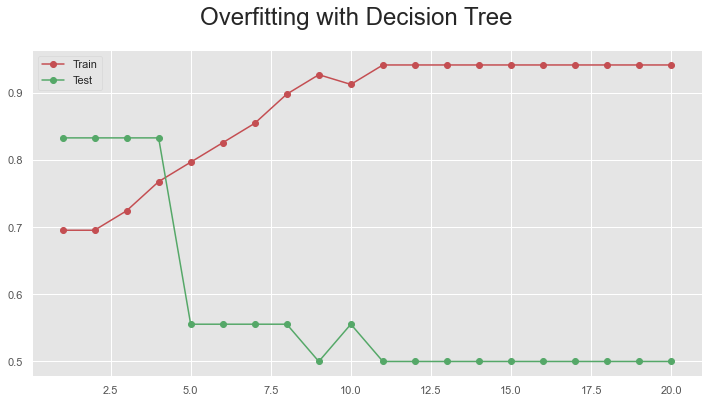

In [33]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 21)]

# evaluate a decision tree for each depth
for i in values:
    
    # configure the model
    decision_tree_model = DecisionTreeClassifier(max_depth=i)

    # fit model on the training dataset
    decision_tree_model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = decision_tree_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = decision_tree_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('--- %d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs number of neighbors
plt.style.use("ggplot")
plt.suptitle("Overfitting with Decision Tree", fontsize=24)
plt.plot(values, train_scores, 'r-o', label='Train')
plt.plot(values, test_scores, 'g-o', label='Test')
plt.legend()
plt.show()

### Overfitting with kNN

--- 1, train: 0.942, test: 0.556
--- 2, train: 0.696, test: 0.833
--- 3, train: 0.739, test: 0.667
--- 4, train: 0.696, test: 0.889
--- 5, train: 0.725, test: 0.833
--- 6, train: 0.652, test: 0.889
--- 7, train: 0.652, test: 0.833
--- 8, train: 0.652, test: 0.889
--- 9, train: 0.638, test: 0.722
--- 10, train: 0.667, test: 0.889
--- 11, train: 0.652, test: 0.833
--- 12, train: 0.667, test: 0.889
--- 13, train: 0.667, test: 0.889
--- 14, train: 0.681, test: 0.889
--- 15, train: 0.623, test: 0.833
--- 16, train: 0.681, test: 0.889
--- 17, train: 0.638, test: 0.833
--- 18, train: 0.667, test: 0.889
--- 19, train: 0.652, test: 0.889
--- 20, train: 0.667, test: 0.889
--- 21, train: 0.667, test: 0.889
--- 22, train: 0.667, test: 0.889
--- 23, train: 0.681, test: 0.889
--- 24, train: 0.667, test: 0.889
--- 25, train: 0.667, test: 0.889
--- 26, train: 0.667, test: 0.889
--- 27, train: 0.667, test: 0.889
--- 28, train: 0.667, test: 0.889
--- 29, train: 0.667, test: 0.889
--- 30, train: 0.667, t

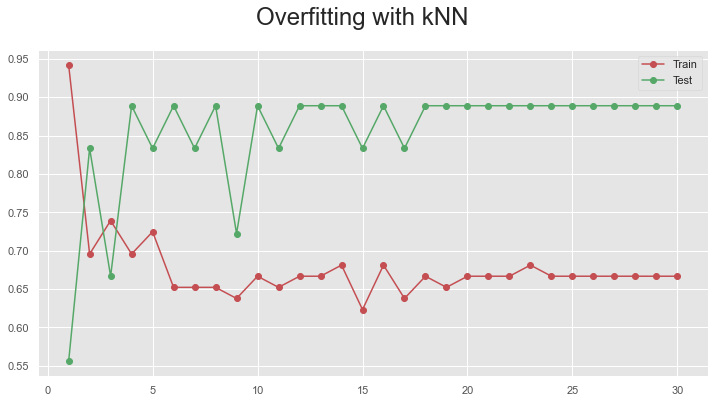

In [34]:
# define lists to collect scores
train_scores, test_scores = list(), list()

# define the tree depths to evaluate
values = [i for i in range(1, 31)]

# evaluate a decision tree for each depth
for i in values:
    
    # configure the model
    kNN_model = KNeighborsClassifier(n_neighbors=i)

    # fit model on the training dataset
    kNN_model.fit(X_train, y_train)
    
    # evaluate on the train dataset
    train_yhat = kNN_model.predict(X_train)
    train_acc = accuracy_score(y_train, train_yhat)
    train_scores.append(train_acc)

    # evaluate on the test dataset
    test_yhat = kNN_model.predict(X_test)
    test_acc = accuracy_score(y_test, test_yhat)
    test_scores.append(test_acc)

    # summarize progress
    print('--- %d, train: %.3f, test: %.3f' % (i, train_acc, test_acc))
    
# plot of train and test scores vs number of neighbors
plt.style.use("ggplot")
plt.suptitle("Overfitting with kNN", fontsize=24)
plt.plot(values, train_scores, 'r-o', label='Train')
plt.plot(values, test_scores, 'g-o', label='Test')
plt.legend()
plt.show()